This is the Model module

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
train_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_train.csv")
test_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_test.csv")

In [3]:
X_vars = ['Runtime', 'Genre Cluster', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'Holiday', 'Adj Merged Budget', 'Has Star Score', 'Has Director Score', 'Has Production Company Score', 'Has Domestic Distributor Score', 'Unweighted Star Score_normalized', 'Simple Weight Star Score_normalized', 'Log Weight Star Score_normalized', 'Exponential Weight Star Score_normalized', 'Total Director Score_normalized', 'Avg Director Score_normalized', 'Total Production Company Score_normalized', 'Avg Production Company Score_normalized', 'Domestic Distributor Score_normalized', 'Season_ASO_4', 'Season_FMA_2', 'Season_MJJ_3', 'Season_NDJ_1']
y = ["Adj Merged Revenue"]

In [4]:
train_X = train_df[X_vars]
train_y = train_df[y]
test_X = test_df[X_vars]
test_y = test_df[y]

We decided to use the iterative importer with a random forrest regressor

In [5]:
imp = IterativeImputer(min_value=0, max_iter=1000, random_state=102, estimator=RandomForestRegressor())

Now to build the pipeline, we need the type of models we want to try.

# Step 3: Building the Pipeline
pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # placeholder, will be replaced by GridSearchCV
])

# Step 4: Define Parameter Grid
param_grid = [
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1, 1]
    },
    {
        'regressor': [SVR()],
        'regressor__C': [1, 10],
        'regressor__kernel': ['linear', 'rbf']
    }
]

# Step 3: Grid Search Setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Step 4: Train and Evaluate
# Assuming 'target_column' is your target variable
grid_search.fit(train_X, train_y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best model:", best_model)
print("Best parameters:", best_params)

In [6]:
# Step 3: Building the Pipeline
# Assuming train_X and train_y are your training features and target variable
# Convert train_y to a 1D array
train_y = np.ravel(train_y)

pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # RandomForestRegressor without grid search
])

# Train the RandomForestRegressor
pipeline.fit(train_X, train_y)

# Get the trained model
trained_model = pipeline.named_steps['regressor']

c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
# Assuming you have test_X as your test features
# Make predictions using the trained model
predictions = pipeline.predict(test_X)

# Now you can use these predictions for further analysis or evaluation
# For instance, if you have test_y (actual target values), you can evaluate the model performance
# For example, using metrics like mean squared error (MSE) or R-squared
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assuming test_y is your actual target variable for the test data
# Evaluate the model
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
mape = mean_absolute_percentage_error(test_y, predictions)
r_squared = r2_score(test_y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 754435662573519.1
Mean Absolute Error (MAE): 11420470.049549164
Mean Absolute Percentage Error (MAPE): 35.470052481812225
R-squared: 0.4815050099971454


c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
for reg in [RandomForestRegressor(), SVR(), GradientBoostingRegressor()]:
    
    train_y = np.ravel(train_y)

    pipeline = Pipeline([
        ('imputer', imp),
        ('regressor', reg)  # RandomForestRegressor without grid search
    ])

    # Train the RandomForestRegressor
    pipeline.fit(train_X, train_y)
    r2cv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="r2")
    rmsecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_root_mean_squared_error")
    mapecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_mean_absolute_percentage_error")
    maecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_mean_absolute_error")

    # Get the trained model
    trained_model = pipeline.named_steps['regressor']

    # Assuming you have test_X as your test features
    # Make predictions using the trained model
    predictions = pipeline.predict(test_X)

    # Now you can use these predictions for further analysis or evaluation
    # For instance, if you have test_y (actual target values), you can evaluate the model performance
    # For example, using metrics like mean squared error (MSE) or R-squared
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    # Assuming test_y is your actual target variable for the test data
    # Evaluate the model
    mse = mean_squared_error(test_y, predictions)
    mae = mean_absolute_error(test_y, predictions)
    mape = mean_absolute_percentage_error(test_y, predictions)
    r_squared = r2_score(test_y, predictions)

    print("Regressor:", reg)
    print("ON TRAINING, CROSS VALIDATION:")
    print("Root Mean Squared Error (MSE):", np.mean(rmsecv))
    print("Mean Absolute Error (MAE):", np.mean(maecv))
    print("Mean Absolute Percentage Error (MAPE):", np.mean(mapecv))
    print("R-squared:", np.mean(r2cv))
    print("ON TESTING:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R-squared:", r_squared)
    

Regressor: RandomForestRegressor()
ON TRAINING, CROSS VALIDATION:
Root Mean Squared Error (MSE): -16789991.446839847
Mean Absolute Error (MAE): -6425021.425237624
Mean Absolute Percentage Error (MAPE): -78.87042312471489
R-squared: 0.5681836403552772
ON TESTING:
Mean Squared Error (MSE): 717182359918783.0
Mean Absolute Error (MAE): 11358573.535890486
Mean Absolute Percentage Error (MAPE): 25.55723780364866
R-squared: 0.5071077906526243
Regressor: SVR()
ON TRAINING, CROSS VALIDATION:
Root Mean Squared Error (MSE): -27683199.49676916
Mean Absolute Error (MAE): -9969571.601332782
Mean Absolute Percentage Error (MAPE): -41.197584296737205
R-squared: -0.1431763915779234
ON TESTING:
Mean Squared Error (MSE): 1710286646186235.8
Mean Absolute Error (MAE): 16097049.078952394
Mean Absolute Percentage Error (MAPE): 43.64954323097659
R-squared: -0.1754150837612778
Regressor: GradientBoostingRegressor()
ON TRAINING, CROSS VALIDATION:
Root Mean Squared Error (MSE): -16845270.555484377
Mean Absolute 

In [10]:
for group in ['1', '2', '3']:
    print(f"Looking at group {group}")
    to_train = train_df[train_df[""]]

    for reg in [RandomForestRegressor(n_estimators=100, max_depth=10), RandomForestRegressor(n_estimators=100, max_depth=20), RandomForestRegressor(n_estimators=100, max_depth=50), SVR(), GradientBoostingRegressor()]:
        
        train_y = np.ravel(train_y)

        pipeline = Pipeline([
            ('imputer', imp),
            ('regressor', reg)  # RandomForestRegressor without grid search
        ])

        # Train the RandomForestRegressor
        pipeline.fit(train_X, train_y)

        # Get the trained model
        trained_model = pipeline.named_steps['regressor']

        # Assuming you have test_X as your test features
        # Make predictions using the trained model
        predictions = pipeline.predict(test_X)

        # Now you can use these predictions for further analysis or evaluation
        # For instance, if you have test_y (actual target values), you can evaluate the model performance
        # For example, using metrics like mean squared error (MSE) or R-squared
        from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

        # Assuming test_y is your actual target variable for the test data
        # Evaluate the model
        mse = mean_squared_error(test_y, predictions)
        mae = mean_absolute_error(test_y, predictions)
        mape = mean_absolute_percentage_error(test_y, predictions)
        r_squared = r2_score(test_y, predictions)

        print("Regressor:", reg)
        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("Mean Absolute Percentage Error (MAPE):", mape)
        print("R-squared:", r_squared)

Looking at group 1


KeyError: ''

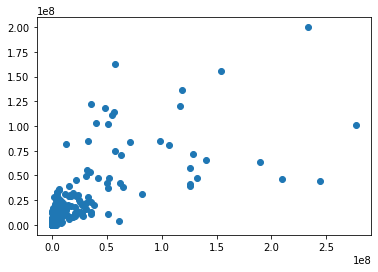

In [ ]:
import matplotlib.pyplot as plt
test_y["Predictions"] = predictions
test_y["differences"] = abs(test_y["Adj Merged Revenue"] - test_y["Predictions"])
plt.scatter(np.array(test_y["Adj Merged Revenue"]), np.array(test_y["Predictions"]))